# Data cleaning and feature engineering in Python
Building better machine learning models for predicting San Francisco housing prices<br>
[source](https://towardsdatascience.com/data-cleaning-and-feature-engineering-in-python-b4d448366022)
![](https://cdn-images-1.medium.com/max/1600/1*2P9X517M_5RJLSvsvzBOdw.jpeg)

In [36]:
from jyquickhelper import add_notebook_menu
add_notebook_menu(last_level=4)

## Introduction 
Housing price data provides a great introduction to machine learning. Anybody who has bought a house or even rented an apartment can easily understand the features: more space, and more rooms, generally lead to a higher price.

So it ought to be easy to develop a model — but sometimes it isn’t, not because machine learning is hard but because data is messy. Also, prices for the exact same house in different neighborhoods of the same city, even only a mile away, may have significantly different prices. The best way to deal with this is to engineer the data so that the model can better handle this situation.

Since finding data can be the hardest problem in machine learning, we will use a great sample set from another data science project on Github which is a set of housing prices in *San Francisco*, mostly over the last few years, scraped from San Francisco Chronicle home sale listings.

## Load data 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
url = 'https://raw.githubusercontent.com/RuiChang123/Regression_for_house_price_estimation/master/final_data.csv'
housing = pd.read_csv(url).drop('Unnamed: 0', axis=1)

## Data overview

In [4]:
housing.head()

,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
0,Address: 1160 Mission Street #2007,San FranciscoSales price: 1300000Sales date: ...,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,83152781.0
1,Address: 260 King Street #475,San FranciscoSales price: 750000Sales date: 0...,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,69819817.0
2,Address: 560 Missouri Street #B,San FranciscoSales price: 1495000Sales date: ...,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,64972847.0
3,Address: 350 Missouri Street,San FranciscoSales price: 2700000Sales date: ...,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107.0,15149489.0
4,Address: 3658 Folsom Street,San FranciscoSales price: 1530000Sales date: ...,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110.0,15161978.0


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 18 columns):
address          11330 non-null object
info             11330 non-null object
z_address        11330 non-null object
bathrooms        11330 non-null float64
bedrooms         11330 non-null float64
finishedsqft     11330 non-null float64
lastsolddate     11330 non-null object
lastsoldprice    11330 non-null float64
latitude         11330 non-null float64
longitude        11330 non-null float64
neighborhood     11330 non-null object
totalrooms       11330 non-null float64
usecode          11330 non-null object
yearbuilt        11330 non-null float64
zestimate        11330 non-null float64
zindexvalue      11330 non-null object
zipcode          11330 non-null float64
zpid             11330 non-null float64
dtypes: float64(11), object(7)
memory usage: 1.6+ MB


In [6]:
housing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bathrooms,11330.0,1.980229e+00,1.047358e+00,5.000000e-01,1.000000e+00,2.000000e+00,2.000000e+00,1.400000e+01
bedrooms,11330.0,2.614475e+00,1.299457e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+01
finishedsqft,11330.0,1.585421e+03,9.219782e+02,1.000000e+00,1.019000e+03,1.362000e+03,1.876000e+03,2.727500e+04
lastsoldprice,11330.0,1.263928e+06,1.042079e+06,5.350000e+02,7.292500e+05,9.900000e+05,1.450000e+06,2.388900e+07
latitude,11330.0,3.775971e+01,2.557802e-02,3.770817e+01,3.773929e+01,3.776051e+01,3.778139e+01,3.780608e+01
longitude,11330.0,-1.224365e+02,3.074340e-02,-1.225107e+02,-1.224552e+02,-1.224325e+02,-1.224134e+02,-1.223812e+02
totalrooms,11330.0,6.111562e+00,1.212582e+01,1.000000e+00,4.000000e+00,5.000000e+00,7.000000e+00,1.264000e+03
yearbuilt,11330.0,1.948498e+03,3.791120e+01,1.860000e+03,1.916000e+03,1.940000e+03,1.986000e+03,2.016000e+03
zestimate,11330.0,1.565695e+06,1.229417e+06,4.323850e+05,9.052375e+05,1.230758e+06,1.731170e+06,1.553325e+07
zipcode,11330.0,9.411691e+04,9.400877e+00,9.410200e+04,9.411000e+04,9.411500e+04,9.412300e+04,9.415800e+04


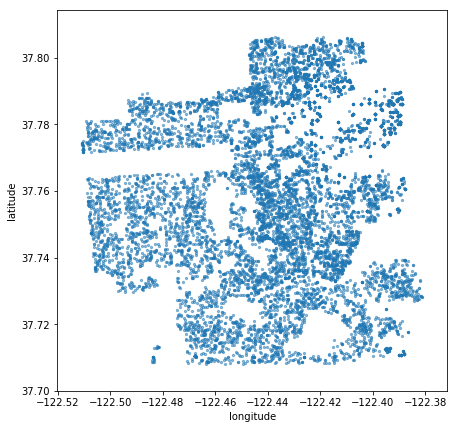

In [7]:
# place distribution based on latitude and longitude
housing.plot(x='longitude', y='latitude', kind='scatter', s=5, alpha=0.5, figsize=(7,7))
# plt.axis('equal')
plt.show()

Below is San Francisco Map

<img 
src="https://www.sfmta.com/sites/default/files/styles/map/public/map-image/2017/10/sfmta-webmap-august2017-j2kl.png" 
alt="San Francisco Map" 
width="400"
height="400"
style="float: left; margin-right: 10px;"
/>

## Distribution with violin plot

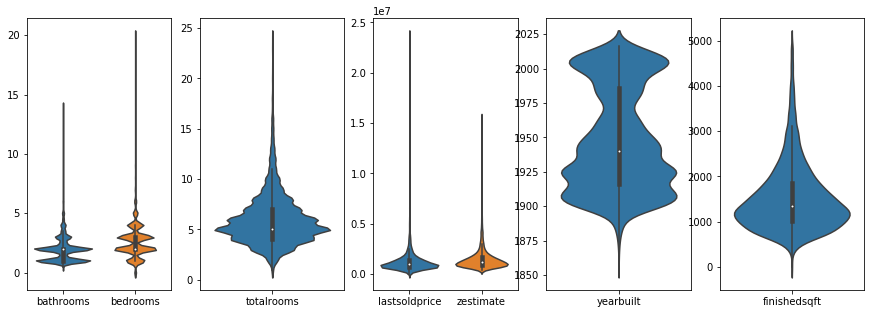

In [8]:
import seaborn as sns
plt.figure(figsize=(15,5))
plt.subplot(1,5,1)
sns.violinplot(data=housing[['bathrooms', 'bedrooms']])
plt.subplot(1,5,2)
sns.violinplot(data=housing[housing.totalrooms<25][['totalrooms']])
plt.subplot(1,5,3)
sns.violinplot(data=housing[['lastsoldprice', 'zestimate']])
plt.subplot(1,5,4)
sns.violinplot(data=housing[['yearbuilt']])
plt.subplot(1,5,5)
sns.violinplot(data=housing[housing.finishedsqft<5e3][['finishedsqft']])
plt.show()


## Data cleaning

Now, let’s take a look at a few graphs of this data set, graphing the total number of rooms by the last sold price.

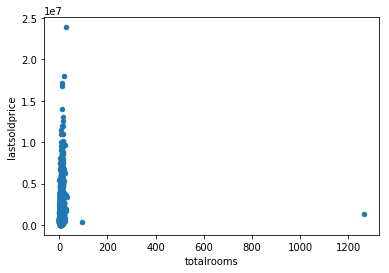

In [9]:
housing.plot.scatter(x='totalrooms', y='lastsoldprice')
plt.show()

That single point in the far lower-right corner is an outlier. Its value is so extreme that it skews the entire graph, so much that we cannot even see any variation on the main set of data. This will distort any attempt to train a machine learning algorithm on this data set. We need to look more closely at this data point and consider what to do with it. If we sort the data by the total number of rooms, one of our axes above, it should stick out.

In [10]:
housing['totalrooms'].astype('int').sort_values()

7524        1
11223       1
3579        1
2132        1
5453        1
2827        1
7621        1
4452        1
8171        1
3211        1
9409        1
92          1
1976        1
10988       1
3179        1
7455        1
10433       1
243         1
5398        1
2321        1
10595       1
7179        1
2016        1
595         1
1304        1
4144        1
2567        1
6719        1
2757        1
2449        1
         ... 
5209       19
6162       19
10698      20
8782       20
8964       20
7381       20
927        20
7736       20
2796       20
9705       21
1978       21
7554       21
4693       22
929        23
1194       23
10287      23
11004      23
2765       23
8288       24
9201       24
6860       24
4802       26
8087       26
11083      27
2601       28
2750       28
10727      28
11175      33
8300       94
8967     1264
Name: totalrooms, Length: 11330, dtype: int64

Indeed, that data point does stick out. It is the very last value in the list, which is a house that has 1,264 rooms! **That is very suspicious, especially since the plot shows it having a pretty low price**. At the very least it is wildly inconsistent with the rest of the data. The same may be the case with the previous value showing 94 rooms. We can take a closer look at these two houses with the following commands, pulling them up by their numeric identifier.

First let’s look at the house which supposedly has 1,264 rooms:

In [11]:
housing[housing.totalrooms == 1264].transpose()

,8967
address,Address: 2829 California Street #3C
info,San FranciscoSales price: 1375000Sales date: ...
z_address,2829 California St APT 3C
bathrooms,2
bedrooms,2
finishedsqft,1264
lastsolddate,03/14/2013
lastsoldprice,1.375e+06
latitude,37.7877
longitude,-122.441


This query shows something even more suspicious, which is that **the `finishedsqft` field is also 1264.0**. In other words, **this is clearly just an error**, probably on data entry — when the original data set was created, somebody accidentally used the same value for both `finishedsqft` and `totalrooms`.

Now, let’s take a look at the value just preceding it, with 94 rooms:

In [12]:
housing[housing.totalrooms == 94].transpose()

,8300
address,Address: 5264 3rd Street #304
info,San FranciscoSales price: 325000Sales date: 0...
z_address,5264 3rd St APT 304
bathrooms,2
bedrooms,2
finishedsqft,805
lastsolddate,07/18/2013
lastsoldprice,325000
latitude,37.7298
longitude,-122.393


This home which supposedly has **94.0 rooms has only two bedrooms and two bathrooms!** Again, **this is an error**. It is not clear how this crept in, but we can be pretty certain that if we go to this house, it does not have 94 rooms, but only two bedrooms and two bathrooms. We will need to eliminate these two data points but first let’s take another look at a graph of `finishedsqft`:

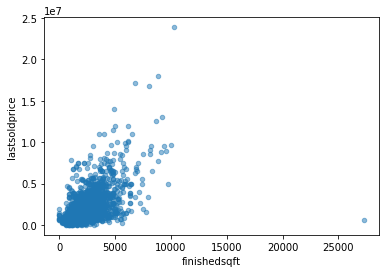

In [13]:
housing.plot.scatter(x='finishedsqft', y='lastsoldprice', alpha=0.5)
plt.show()

There is **another outlier** in the lower-right. Let’s take a closer look at this data:

In [14]:
pd.options.display.max_rows = 30
housing['finishedsqft'].sort_values()

1618         1.0
3405         1.0
10652        1.0
954          1.0
11136        1.0
5103         1.0
916          1.0
10967        1.0
7383         1.0
1465         1.0
8134       243.0
7300       244.0
6485       250.0
7621       252.0
3199       264.0
          ...   
5408      8120.0
2294      8125.0
7137      8180.0
3225      8335.0
1611      8675.0
8231      8820.0
6766      8822.0
7818      9125.0
427       9190.0
4575      9378.0
5704      9540.0
9650      9699.0
8087     10000.0
2750     10236.0
4997     27275.0
Name: finishedsqft, Length: 11330, dtype: float64

First, unexpectedly, **there are ten houses listed at 1.0 square feet**. This is **clearly wrong**. Note that these were impossible to see in the graph, we had to look at the actual values. Additionally, the above results show the largest house at 27,275.0 square feet. It turns out, **this is a house with only 2.0 bedrooms and 2.0 bathrooms, even though it is listed at 27,275 square feet, so this is almost certainly a mistake**, or at least an extreme outlier. Let’s eliminate all of these outliers and take another look at the graph.

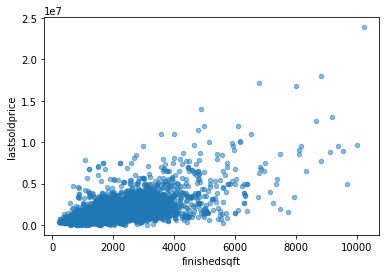

In [15]:
housing = housing[housing.finishedsqft > 1]
housing = housing[housing.finishedsqft < 27275]
housing = housing[housing.totalrooms < 94]
housing.plot.scatter(x='finishedsqft', y='lastsoldprice', alpha=0.5)
plt.show()

This is looking much better. There still may be some outliers in here, and we could investigate them more closely if we really wanted to, but there are no single data points in this view that are distorting the graph, and probably none (that we can see) that would distort a machine learning model.

## Feature engineering
Now that we have cleaned the data, we need to do some feature engineering. This involves transforming the values in the data set into numeric values that machine learning algorithms can use.

Take the “lastsolddate” value, for example. In the current data set, this is a string in the form of “mm/dd/yyyy.” We need to change this into a numeric value, which we can do with the following Pandas command:

In [16]:
housing['lastsolddateint'] = pd.to_datetime(housing['lastsolddate'], format='%m/%d/%Y').astype('int')
housing['lastsolddateint'] = housing['lastsolddateint']//1e9
housing = housing[housing['lastsolddateint'].notnull()]

Now let’s create a checkpoint for our data so that we can refer back to it later.

In [17]:
clean_data = housing.copy()

I prefer to create functions to do this sort of work that we might do again and again, as we will see below, in order to simplify the code as we try out different hypotheses.

We remove the columns in `remove_list` for a number of reasons. Some of them are text values we just cannot do much with (`info`, `address`, `z_address`, `zipcode`, `zpid`). The `latitude` and `longitude` fields might be useful in some form but for this example it may just complicate things — no reason not to experiment with it in the future though. The `zestimate` and `zindexvalue` fields were actually produced by other data science techniques (probably from `Zillow`), so using them would be cheating! Finally, we will drop usecode (e.g. `house`, `condo`, `mobile home`) which could be quite useful but we will not use it for this example.

In [18]:
def drop_geog(data, keep = []):     
    remove_list = ['info','address','z_address','longitude','latitude','neighborhood',
                   'lastsolddate','zipcode','zpid','usecode', 'zestimate','zindexvalue']
    for k in keep:
        remove_list.remove(k)
    data = data.drop(remove_list, axis=1)
    data = data.drop(data.columns[data.columns.str.contains('unnamed', case=False)], axis=1)
    return data  

housing = drop_geog(housing)

In [19]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11317 entries, 0 to 11329
Data columns (total 7 columns):
bathrooms          11317 non-null float64
bedrooms           11317 non-null float64
finishedsqft       11317 non-null float64
lastsoldprice      11317 non-null float64
totalrooms         11317 non-null float64
yearbuilt          11317 non-null float64
lastsolddateint    11317 non-null int64
dtypes: float64(6), int64(1)
memory usage: 707.3 KB


Now that we have cleaned up the data, let’s take a look at how a few algorithms manage using it. We will use scikit-learn.

## Modelling
First, we need to split the data into testing and training sets, again using a function that we can reuse later. This assures that when we test the data, we are actually testing the model on data it has never seen before.

In [20]:
from sklearn.model_selection import train_test_split

def split_data(data):
    y = data['lastsoldprice']
    X = data.drop('lastsoldprice', axis=1)
    # Return (X_train, X_test, y_train, y_test)
    return train_test_split(X, y, test_size=0.2, random_state=30)

housing_split = split_data(housing)

### Linear Regression
Let’s try Linear Regression first.

In [21]:
import sys
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np

from sklearn.linear_model import LinearRegression

def train_eval(algorithm, grid_params, X_train, X_test, y_train, y_test):
    regression_model = GridSearchCV(algorithm, grid_params, cv=5, n_jobs=-1, verbose=1)
    regression_model.fit(X_train, y_train)
    y_pred = regression_model.predict(X_test)
    print("R2: \t", r2_score(y_test, y_pred))
    print("RMSE: \t", sqrt(mean_squared_error(y_test, y_pred)))
    print("MAE: \t", mean_absolute_error(y_test, y_pred))
    return regression_model
    
model = train_eval(LinearRegression(), {}, *housing_split)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
R2: 	 0.5366066917132126
RMSE: 	 750678.476479483
MAE: 	 433245.65193839185


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


This `train_eval` function can be used for any arbitrary scikit-learn algorithm, for both training and evaluation. This is one of the great benefits of scikit-learn. The first line of the function incorporates a set hyperparameters that we want to evaluate against. In this case, we pass in {} so we can just use the default hyperparameters on the model. The second and third lines of this function do the actual work, fitting the model and then running a prediction on it. The print statements then show some stats that we can evaluate. Let’s see how we faired.

The first score, R², also known as the **Coefficient of Determination**, is a general evaluation of the model showing the percentage of variation in the prediction that can be explained by the features. In general, a higher R² value is better than a lower one. The other two stats are root mean squared error and mean absolute error. These two can only be evaluated in relation to other evaluations of the same statistic on other models. Having said that, **an R² of .53, and the other stats in the many hundreds of thousands (for houses probably costing one or two million) is not great. We can do better.**

Let’s see how a few other algorithms perform. First, K-Nearest Neighbors (KNN).

### K-Nearest Neighbors

In [22]:
from sklearn.neighbors import KNeighborsRegressor
knn_params = {'n_neighbors' : [1, 5, 10, 20, 30, 50, 75, 100, 200, 500]}
knn_model = train_eval(KNeighborsRegressor(), knn_params, *housing_split)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
R2: 	 0.15060023694456648
RMSE: 	 1016330.95341843
MAE: 	 540260.1489399293


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.1s finished


**If Linear Regression is mediocre, KNN is terrible!**

### Decision Tree
Next we will try Decision Tree.

In [23]:
from sklearn.tree import DecisionTreeRegressor

tree_params = {}
dt_model = train_eval(DecisionTreeRegressor(), tree_params, *housing_split)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
R2: 	 0.12105929714315622
RMSE: 	 1033853.1926968793
MAE: 	 488313.54637809185


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


**This is even worse!**

### Random Forrest.
Finally, let’s look at Random Forrest.

In [24]:
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

forest_params = {'n_estimators': [200], 'max_depth': [10], 'min_samples_split': [2]}
forest = train_eval(RandomForestRegressor(), forest_params, *housing_split)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.1s finished


R2: 	 0.5999778236135618
RMSE: 	 697462.9126517676
MAE: 	 382142.4257431038


This one is a bit better, but we can still do better.

How do we improve on these results? One option is to try other algorithms, and there are many, and some will do better. But we can actually fine tune our results by getting our hands dirty in the data with feature engineering.

## More feature engineering
Let’s reconsider some of the features that we have in our data. Neighborhood is an interesting field. The values are things like “Portrero Hill” and “South Beach.” These cannot be simply ordered (from most expensive to least expensive neighborhood), or at least, doing so would not necessarily produce better results. But we all know that the same house in two different neighborhoods will have two different prices. So we want this data. How do we use it?

Python’s Pandas library gives us a simple tool for creating a “one-hot encoding” of these values. This takes the single column of “neighborhood” and creates a new column for each value in the original neighborhood column. For each of these new rows (with new column header names like “Portrero Hill” and “South Beach”), if a row of data has that value for the neighborhood in the original column, it is set to 1, otherwise it is set to 0. The machine learning algorithms can now build a weight associated with that neighborhood, which is either applied if the data point is in that neighborhood (if the value for that column is 1) or not (if it is 0).

First, we need to retrieve our check-pointed data, this time keeping the `neighborhood` field.

In [25]:
housing_cleaned = drop_geog(clean_data.copy(), ['neighborhood'])

### One-hot encoding
Now we can create a one-hot encoding for the `neighborhood` field. One-hot encoding must be done before spiliting data

In [26]:
one_hot = pd.get_dummies(housing_cleaned['neighborhood'])
housing_cleaned = housing_cleaned.drop('neighborhood',axis = 1)

We will hold onto the “one_hot” value and add it later. But first, we have to do two more things. We need to split the data into a training set and a test set.

In [27]:
(X_train, X_test, y_train, y_test) = split_data(housing_cleaned)

### Scaling and centering
For our final step, we need to scale and center the data, then join with `one-hot`.

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train[X_train.columns] = scaler.transform(X_train[X_train.columns])
X_train = X_train.join(one_hot)
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])
X_test = X_test.join(one_hot)

housing_split_cleaned = (X_train, X_test, y_train, y_test)

Let’s unpack this step a bit.

**First**, we apply `StandardScaler()`. This function scales and centers the data by **subtracting the mean** of the column and **dividing the standard deviation** of the column, for all data points in each column. This standardizes all of the data, giving each column a normal distribution. It also scales the data, because some fields will vary from 0 to 10,000, such as `finishedsqft,` while others will vary only from 0 to 30, such as number of rooms. **Scaling will put them all on the same scale**, so that one feature does not arbitrarily play a bigger role than others just because it has a higher maximum value. For some machine learning algorithms, as we will see below, this is critical to getting even a half decent result.

**Second**, it is important to note that we have to `fit` the scaler on the training features, `X_train`. That is, we take the mean and standard deviation of the training data, fit the scaler object with these values, then transform the training data AND the test data using that fitted scaler. **We do not want to fit the scaler on the test data, as that would then leak information from the test data set into the trained algorithm**. We could end up with results that appear better than they are (because the algorithm already is trained on test data) or appear worse (because the test data is scaled on their own data set, and not on the test data set).

Now, let’s rebuild our models with the newly engineered features.

#### Linear Regression

In [30]:
model = train_eval(LinearRegression(), {}, *housing_split_cleaned)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
R2: 	 0.6328638462098808
RMSE: 	 668178.7532611003
MAE: 	 371454.36307420494


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished


Now, under Linear Regression, the simplest algorithm we have, the results are already better than anything we saw previously.

#### kNN
Next is KNN.

In [31]:
model = train_eval(KNeighborsRegressor(), knn_params, *housing_split_cleaned)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.9min finished


R2: 	 0.6938710004544473
RMSE: 	 610142.5615480896
MAE: 	 303699.6739399293


This is an a huge improvement.

#### Decision Tree:

In [32]:
model = train_eval(DecisionTreeRegressor(), tree_params,*housing_split_cleaned)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
R2: 	 0.47774078987181
RMSE: 	 796933.6017287255
MAE: 	 372417.65282685513


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


Still pretty bad, but better than before.

#### Random Forrest
Finally, Random Forrest.

In [35]:
model = train_eval(RandomForestRegressor(), forest_params, *housing_split_cleaned)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.8s finished


R2: 	 0.6229709728376616
RMSE: 	 677121.3049487913
MAE: 	 355165.7294974494


Again, a decent improvement.

There is certainly far more that can be done with this data, from additional feature engineering to trying additional algorithms. But the lesson, from this short tutorial, is that **seeking more data or pouring over the literature for better algorithms may not always be the right next step**. It may be better to get the absolute most you can out of a simpler algorithm first, not only for comparison but because data cleaning may pay dividends down the road.

Finally, in spite of its simplicity, K-Nearest Neighbors can be quite affective, so long as we treat it with the proper care.